Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Fri Nov 17 16:17:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 8 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com/

In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=b71d31a7d57d9f15155028ad2ce482b40d9448a8a3003acaf6b35e1b058d751d
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [4]:
import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0jepvh5h
  JVM stdout: /tmp/tmp0jepvh5h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0jepvh5h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_jy962g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
df = h2o.import_file('https://drive.google.com/u/0/uc?id=14XVqtU6y7hs9LvrX5dyPSp5KCBix2PuX&export=download')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
df.types

{'id': 'int',
 'y': 'int',
 'amount_current_loan': 'int',
 'term': 'enum',
 'credit_score': 'enum',
 'loan_purpose': 'enum',
 'yearly_income': 'int',
 'home_ownership': 'enum',
 'bankruptcies': 'int'}

In [10]:
df["y"]= df["y"].asfactor()

In [11]:
df.describe()

Rows:1000000
Cols:9

,id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies
type,int,enum,int,enum,enum,enum,int,enum,int
mins,1.0,,10802.0,,,,76627.0,,0.0
mean,500000.5,,316659.37146799883,,,,1344805.2238530994,,0.1192111761729923
maxs,1000000.0,,789250.0,,,,165557393.0,,7.0
sigma,288675.2789323441,,186863.51428798583,,,,1278949.9212439882,,0.35467383607377956
zeros,0,,0,,,,0,,886855
missing,0,0,0,0,0,0,219439,0,1805
0,1.0,0,386342.0,short,very_good,other,1371971.0,rent,0.0
1,2.0,0,429000.0,short,good,debt_consolidation,823042.0,mortgage,0.0
2,3.0,0,344608.0,short,good,debt_consolidation,1316567.0,rent,0.0


In [12]:
dftrain,dftest,dfvalid = df.split_frame(ratios=[.6, .2])

In [13]:
dftrain

id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies
2,0,429000,short,good,debt_consolidation,823042,mortgage,0
3,0,344608,short,good,debt_consolidation,1.31657e+06,rent,0
5,0,654126,short,good,debt_consolidation,1.24285e+06,rent,0
7,0,317570,short,good,debt_consolidation,1.9376e+06,mortgage,0
8,0,227986,long,good,debt_consolidation,469680,rent,1
9,0,409354,short,good,other,815480,rent,0
11,0,440880,short,good,debt_consolidation,1.72624e+06,rent,0
12,0,220000,short,good,debt_consolidation,722000,rent,0
13,0,58564,short,very_good,home_improvements,2.84333e+06,mortgage,0
14,0,786786,long,good,debt_consolidation,1.74694e+06,mortgage,0


In [14]:
y = "y"
x = df.columns
x.remove(y)
x.remove("id")

In [15]:
aml = H2OAutoML(max_models = 10, seed = 10, max_runtime_secs = 60, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [16]:
!nvidia-smi

Fri Nov 17 16:21:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
aml.train(x = x, y = y, training_frame = dftrain, validation_frame=dfvalid)

AutoML progress: |
16:22:10.950: Project: AutoML_1_20231117_162210
16:22:10.952: Cross-validation disabled by user: no fold column nor nfolds > 1.
16:22:10.952: Setting stopping tolerance adaptively based on the training frame: 0.0012914239185999792
16:22:10.952: Build control seed: 10
16:22:10.953: training frame: Frame key: AutoML_1_20231117_162210_training_py_4_sid_a672    cols: 9    rows: 599601  chunks: 8    size: 9650571  checksum: -384204033386179920
16:22:10.953: validation frame: Frame key: py_6_sid_a672    cols: 9    rows: 200138  chunks: 8    size: 3151852  checksum: -369079598075798790
16:22:10.954: leaderboard frame: Frame key: py_6_sid_a672    cols: 9    rows: 200138  chunks: 8    size: 3151852  checksum: -369079598075798790
16:22:10.954: blending frame: NULL
16:22:10.954: response column: y
16:22:10.954: fold column: null
16:22:10.954: weights column: null
16:22:10.974: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 9

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20231117_162210


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.19991456753471312
RMSE: 0.4471180688975934
LogLoss: 0.5716131923100577
Mean Per-Class Error: 0.37772527685110147
AUC: 0.7468611281147485
AUCPR: 0.7768631796611289
Gini: 0.49372225622949695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3557189774011182
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      109189  190721  0.6359   (190721.0/299910.0)
1      35820   263871  0.1195   (35820.0/299691.0)
Total  145009  454592  0.3778   (226541.0/599601.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.355719     0.69966   268
max f2                       0.20466      0.835836  352
max f0point5                 0.524825     0.686195  155
max accuracy                 0.496716     0.674802  173
max precision                0.999551     1         0
max recall                   0.0556428    1         398
max specificity              0.999551     1         0
max absolute_mcc             0.600697     0.363832  111
max min_per_class_accuracy   0.461548     0.671305  198
max mean_per_class_accuracy  0.496716     0.674771  173
max tns                      0.999551     299910    0
max fns                      0.999551     272545    0
max fps                      0.0474073    299910    399
max tps                      0.0556428    299691    398
max tnr                      0.999551     1         0
max fnr                      0.999551     0.90942   0
max fpr                      0.0474073    1         399
max tpr                      0.0556428    1         398

Gains/Lift Table: Avg response rate: 49.98 %, avg score: 49.97 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100167                   0.999639           2.00073   2.00073            1                0.999694  1                           0.999694            0.0200406       0.0200406                  100.073   100.073            0.0200406
2        0.020005                    0.999571           2.00073   2.00073            1                0.999603  1                           0.999648            0.0199839       0.0400246                  100.073   100.073            0.0400246
3        0.0300133                   0.999515           2.00073   2.00073            1                0.999544  1                           0.999613            0.020024        0.0600485                  100.073   100.073            0.0600485
4        0.0400049                   0.999455           2.00073   2.00073            1                0.999487  1                           0.999582            0.0199906       0.0800391                  100.073   100.073            0.0800391
5        0.0500166                   0.999382           2.00073   2.00073            1                0.999419  1                           0.999549            0.0200306       0.10007                    100.073   100.073            0.10007
6        0.100123                    0.817784           1.98275   1.99173            0.991013         0.984929  0.995503                    0.992233            0.099349        0.199419                   98.2751   99.1733            0.198518
7        0.150006                    0.681285           1.53

In [18]:
!nvidia-smi

Fri Nov 17 16:23:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |    231MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
lb = aml.leaderboard

In [20]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_1_20231117_162210,0.703734,0.597724,0.742782,0.422394,0.460155,0.211743
GLM_1_AutoML_1_20231117_162210,0.649722,0.682024,0.645688,0.473317,0.4944,0.244431


In [21]:
dfpred=aml.leader.predict(dftest)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [22]:
dfpred.head()

predict,p0,p1
1,0.536253,0.463747
0,0.775561,0.224439
0,0.764347,0.235653
1,0.585409,0.414591
1,0.311206,0.688794
1,0.587146,0.412854
0,0.729724,0.270276
1,0.516161,0.483839
1,0.577563,0.422437
0,0.765004,0.234996


In [23]:
aml.leader.model_performance(dftest)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.21123631480813304
RMSE: 0.45960452000402807
LogLoss: 0.5965957579148857
Mean Per-Class Error: 0.4266024878213843
AUC: 0.7061969027905958
AUCPR: 0.7461242578692084
Gini: 0.41239380558119154

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31531895940019794
       0      1       Error    Rate
-----  -----  ------  -------  ------------------
0      23880  75971   0.7608   (75971.0/99851.0)
1      9274   91136   0.0924   (9274.0/100410.0)
Total  33154  167107  0.4257   (85245.0/200261.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.315319     0.681347  296
max f2                       0.123284     0.834346  385
max f0point5                 0.550676     0.651614  139
max accuracy                 0.514838     0.64394   162
max precision                0.999551     1         0
max recall                   0.0515766    1         399
max specificity              0.999551     1         0
max absolute_mcc             0.716801     0.329312  57
max min_per_class_accuracy   0.460652     0.638801  199
max mean_per_class_accuracy  0.514838     0.644292  162
max tns                      0.999551     99851     0
max fns                      0.999551     91542     0
max fps                      0.0515766    99851     399
max tps                      0.0515766    100410    399
max tnr                      0.999551     1         0
max fnr                      0.999551     0.911682  0
max fpr                      0.0515766    1         399
max tpr                      0.0515766    1         399

Gains/Lift Table: Avg response rate: 50.14 %, avg score: 49.93 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100169                   0.999636           1.99443   1.99443            1                0.999692  1                           0.999692            0.0199781       0.0199781                  99.4433   99.4433            0.0199781
2        0.0200039                   0.99957            1.99443   1.99443            1                0.9996    1                           0.999646            0.0199183       0.0398964                  99.4433   99.4433            0.0398964
3        0.0300258                   0.999514           1.99443   1.99443            1                0.999542  1                           0.999612            0.019988        0.0598845                  99.4433   99.4433            0.0598845
4        0.0400128                   0.999454           1.99443   1.99443            1                0.999486  1                           0.99958             0.0199183       0.0798028                  99.4433   99.4433            0.0798028
5        0.0500047                   0.999378           1.99443   1.99443            1                0.999417  1                           0.999547            0.0199283       0.0997311                  99.4433   99.4433            0.0997311
6        0.100004                    0.818476           1.96017   1.9773             0.982822         0.985747  0.991412                    0.992647            0.0980082       0.197739                   96.0173   97.7304            0.196017
7        0.150049                    0.680247           1.37294   1.77573            0.688386         0.727716  0.890346                    0.904287            0.0687083       0.266448                   37.2939   77.5735            0.233448


In [24]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [25]:
model_ids

['XGBoost_1_AutoML_1_20231117_162210', 'GLM_1_AutoML_1_20231117_162210']

In [26]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20231117_162210


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.19991456753471312
RMSE: 0.4471180688975934
LogLoss: 0.5716131923100577
Mean Per-Class Error: 0.37772527685110147
AUC: 0.7468611281147485
AUCPR: 0.7768631796611289
Gini: 0.49372225622949695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3557189774011182
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      109189  190721  0.6359   (190721.0/299910.0)
1      35820   263871  0.1195   (35820.0/299691.0)
Total  145009  454592  0.3778   (226541.0/599601.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.355719     0.69966   268
max f2                       0.20466      0.835836  352
max f0point5                 0.524825     0.686195  155
max accuracy                 0.496716     0.674802  173
max precision                0.999551     1         0
max recall                   0.0556428    1         398
max specificity              0.999551     1         0
max absolute_mcc             0.600697     0.363832  111
max min_per_class_accuracy   0.461548     0.671305  198
max mean_per_class_accuracy  0.496716     0.674771  173
max tns                      0.999551     299910    0
max fns                      0.999551     272545    0
max fps                      0.0474073    299910    399
max tps                      0.0556428    299691    398
max tnr                      0.999551     1         0
max fnr                      0.999551     0.90942   0
max fpr                      0.0474073    1         399
max tpr                      0.0556428    1         398

Gains/Lift Table: Avg response rate: 49.98 %, avg score: 49.97 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100167                   0.999639           2.00073   2.00073            1                0.999694  1                           0.999694            0.0200406       0.0200406                  100.073   100.073            0.0200406
2        0.020005                    0.999571           2.00073   2.00073            1                0.999603  1                           0.999648            0.0199839       0.0400246                  100.073   100.073            0.0400246
3        0.0300133                   0.999515           2.00073   2.00073            1                0.999544  1                           0.999613            0.020024        0.0600485                  100.073   100.073            0.0600485
4        0.0400049                   0.999455           2.00073   2.00073            1                0.999487  1                           0.999582            0.0199906       0.0800391                  100.073   100.073            0.0800391
5        0.0500166                   0.999382           2.00073   2.00073            1                0.999419  1                           0.999549            0.0200306       0.10007                    100.073   100.073            0.10007
6        0.100123                    0.817784           1.98275   1.99173            0.991013         0.984929  0.995503                    0.992233            0.099349        0.199419                   98.2751   99.1733            0.198518
7        0.150006                    0.681285           1.53

In [27]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [28]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_1_AutoML_1_20231117_162210',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_1_AutoML_1_20231117_162210'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231117_162210_training_py_4_sid_a672',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231117_162210_training_py_4_sid_a672'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231117_162210_training_py_4_sid_a672',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231117_162210_training_py_4_sid_a672'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 10.0,
  'nthread': 2,
  'seed': 10,
  'max_bin': 256,
  'max_depth': 15,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20231115_212512


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.2001271143097897
RMSE: 0.44735569104437434
LogLoss: 0.5721175558530497
Mean Per-Class Error: 0.3609573804743616
AUC: 0.7462135175885478
AUCPR: 0.7764659320721197
Gini: 0.49242703517709563

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38234446234486746
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      131233  168940  0.5628   (168940.0/300173.0)
1      47745   252338  0.1591   (47745.0/300083.0)
Total  178978  421278  0.361    (216685.0/600256.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.382344     0.699616  248
max f2                       0.216063     0.835901  346
max f0point5                 0.543571     0.686095  138
max accuracy                 0.486644     0.674231  176
max precision                0.999266     1         0
max recall                   0.0679217    1         396
max specificity              0.999266     1         0
max absolute_mcc             0.575811     0.363987  120
max min_per_class_accuracy   0.461909     0.667869  193
max mean_per_class_accuracy  0.486644     0.674222  176
max tns                      0.999266     300173    0
max fns                      0.999266     267466    0
max fps                      0.0430843    300173    399
max tps                      0.0679217    300083    396
max tnr                      0.999266     1         0
max fnr                      0.999266     0.891307  0
max fpr                      0.0430843    1         399
max tpr                      0.0679217    1         396

Gains/Lift Table: Avg response rate: 49.99 %, avg score: 49.97 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100191                   0.999503           2.0003    2.0003             1                0.999576  1                           0.999576            0.0200411       0.0200411                  100.03    100.03             0.0200411
2        0.0200048                   0.999388           2.0003    2.0003             1                0.999446  1                           0.999511            0.0199745       0.0400156                  100.03    100.03             0.0400156
3        0.0300105                   0.999251           2.0003    2.0003             1                0.999323  1                           0.999448            0.0200145       0.0600301                  100.03    100.03             0.0600301
4        0.0400013                   0.999097           2.0003    2.0003             1                0.999173  1                           0.999379            0.0199845       0.0800145                  100.03    100.03             0.0800145
5        0.0500003                   0.998931           2.0003    2.0003             1                0.999016  1                           0.999307            0.0200011       0.100016                   100.03    100.03             0.100016
6        0.100001                    0.818105           1.98217   1.99124            0.990937         0.984173  0.995469                    0.99174             0.0991092       0.199125                   98.2172   99.1236            0.198219
7        0.150001                    0.680744           1.5

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()

,0,1,Error,Rate
0,131233.0,168940.0,0.5628,(168940.0/300173.0)
1,47745.0,252338.0,0.1591,(47745.0/300083.0)
Total,178978.0,421278.0,0.361,(216685.0/600256.0)


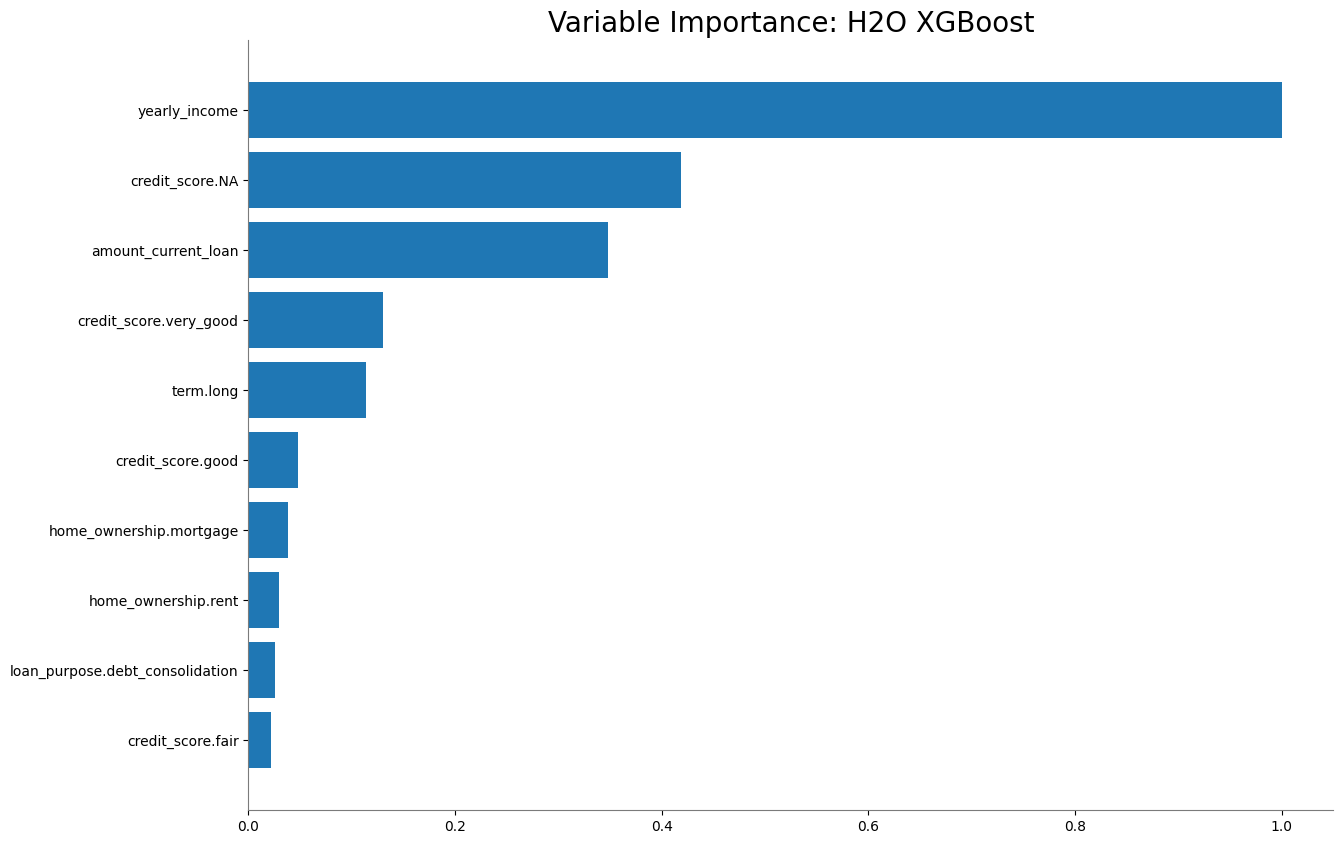

<Figure size 640x480 with 0 Axes>

In [29]:
out.varimp_plot()

In [30]:
aml.leader.download_mojo(path = "./")

'/content/XGBoost_1_AutoML_1_20231117_162210.zip'